In [26]:
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb


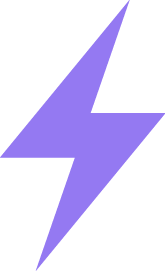

Running local mode, some functionality limited.



In [27]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [28]:
twentyfive = pd.read_csv('china25.csv')

In [29]:
twentyfive.head()

Name   Province  Population rank (core city)  \
0  Guangzhou  Guangdong                          NaN   
1   Shanghai   Shanghai                          NaN   
2  Chongqing  Chongqing                          NaN   
3    Beijing    Beijing                          NaN   
4   Hangzhou   Zhejiang                          NaN   

   Population rank (Primary Statistical Area)  \
0                                           1   
1                                           2   
2                                           3   
3                                           4   
4                                           5   

   Distance to closest larger Chinese Metropolitan Area (KM)     Power  \
0                                              40000          40000.00   
1                                               1230            615.00   
2                                               1000            333.33   
3                                               1100            275.00   
4                                                200             40.00   

   Population MetropolitanArea  Population MetroPower  \
0                     44294245          1771769800000   
1                     35965403            44237445690   
2                     30165500            30165500000   
3                     21500000            23650000000   
4                     21102000             4220400000   

   Rolling population total  GDP per capita of Province  \
0                  44294245                         NaN   
1                  80259648                         NaN   
2                 110425148                         NaN   
3                 131925148                         NaN   
4                 153027148                         NaN   

   Distance from a foreign country (KM)  Score  \
0                                   NaN    NaN   
1                                   NaN    NaN   
2                                   NaN    NaN   
3                                   NaN    NaN   
4                                   NaN    NaN   

   If part of a larger city's transportation, city name Closest City Name  \
0                                                NaN                  NaN   
1                                                NaN            Guangzhou   
2                                                NaN            Guangzhou   
3                                                NaN             Shanghai   
4                                                NaN             Shanghai   

   Closest City Rank Largest in Province?  Longitude  Latitude  
0                NaN                  Yes  23.183333    113.50  
1                1.0                  Yes  31.000000    122.00  
2                1.0                  Yes  29.500000    106.40  
3                2.0                  Yes  40.000000    116.50  
4                2.0                  Yes  30.250000    120.25

In [30]:
X = twentyfive[['Latitude','Longitude']]
x = twentyfive['Latitude']

In [31]:
y = twentyfive['Longitude']
labels = twentyfive['Name']

In [32]:
lgn.scatter(x, y, labels = twentyfive['Name'])

# DBSCAN

In [33]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2, min_samples = 2)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
    min_samples=2, n_jobs=1, p=None)

In [34]:
labels = dbscan.labels_
print(labels) # comprehension: what do these mean? How many are there?
# Observations that did not make it into a DB qualified cluster will recieve the label of -1

[ 0  1 -1  2  1 -1 -1  2  0 -1 -1 -1 -1 -1 -1 -1 -1  3  0 -1 -1  3 -1 -1 -1]


In [35]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print n_clusters_

4


In [36]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.017


In [37]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Estimated number of clusters: 4
Homogeneity: 0.356
Completeness: 1.000
V-measure: 0.525


In [38]:
import numpy as np
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscan.core_sample_indices_] = True 
print(core_samples)

[ True  True False  True  True False False  True  True False False False
 False False False False False  True  True False False  True False False
 False]


In [39]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = X.loc[class_member_mask & core_samples, :]
    plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = X.loc[class_member_mask & ~core_samples, :]
    plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)
    
plt.show()

In [40]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

Silhouette Coefficient: 0.017
Estimated number of clusters: 4
Homogeneity: 0.356
Completeness: 1.000
V-measure: 0.525
[ True  True False  True  True False False  True  True False False False
 False False False False False  True  True False False  True False False
 False]


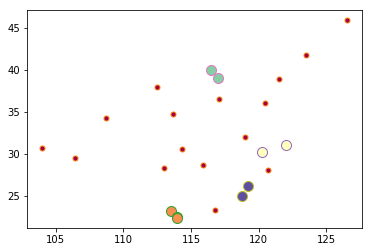

In [41]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.133
Estimated number of clusters: 4
Homogeneity: 0.445
Completeness: 1.000
V-measure: 0.616
[ True  True  True  True  True  True  True  True  True False  True  True
 False False  True  True False  True  True  True False  True  True False
 False]


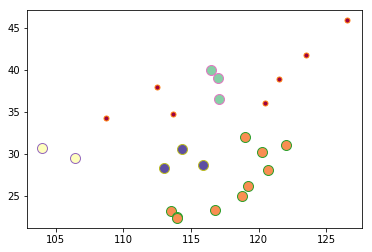

In [42]:
dbscanner(x, y, 3, 2)

In [43]:
dbscanner(x, y, 3.5, 2)

Silhouette Coefficient: 0.204
Estimated number of clusters: 5
Homogeneity: 0.488
Completeness: 1.000
V-measure: 0.656
[ True  True  True  True  True  True  True  True  True False  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True]


In [44]:
dbscanner(x, y, 5, 2)

Silhouette Coefficient: 0.212
Estimated number of clusters: 2
Homogeneity: 0.138
Completeness: 1.000
V-measure: 0.242
[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True]


In [45]:
lgn.scatter(x, y, labels = sixtycities['Name'])

## 60 Largest Cities

In [53]:
sixty = pd.read_csv('china60.csv')
X = sixty[['Latitude','Longitude']]
x = sixty['Latitude']
y = sixty['Longitude']
labels = sixty['Name']
lgn.scatter(x, y, labels = sixty['Name'])

In [54]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.238
Estimated number of clusters: 12
Homogeneity: 0.526
Completeness: 0.978
V-measure: 0.684
[ True  True  True  True  True False False  True  True False  True  True
  True False  True False  True  True  True  True  True  True  True False
  True False False False  True  True  True  True  True  True  True  True
  True  True  True False False  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True]


In [55]:
dbscanner(x, y, 3, 2)

Silhouette Coefficient: 0.226
Estimated number of clusters: 3
Homogeneity: 0.155
Completeness: 0.931
V-measure: 0.266
[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True]


Silhouette Coefficient: 0.522
Estimated number of clusters: 1
Homogeneity: 0.031
Completeness: 0.842
V-measure: 0.059
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


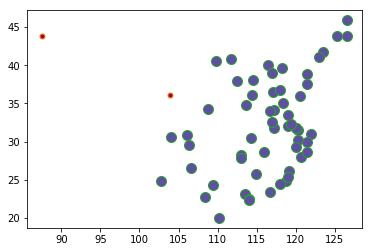

In [56]:
dbscanner(x, y, 5, 2)

# 100 largest cities

In [21]:
hundred = pd.read_csv('100cities.csv')

In [30]:
X = hundred[['Latitude','Longitude']]
x = hundred['Latitude']

In [31]:
y = hundred['Longitude']

In [32]:
lgn.scatter(x, y, labels = hundred['Name'])

Silhouette Coefficient: 0.194
Estimated number of clusters: 11
Homogeneity: 0.430
Completeness: 0.793
V-measure: 0.558
[ True  True  True  True  True  True  True False  True False  True  True
 False  True False  True  True  True False  True False  True  True  True
  True False False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True False  True  True False False  True  True  True  True False  True
  True False False  True  True  True  True False False  True  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True  True  True]


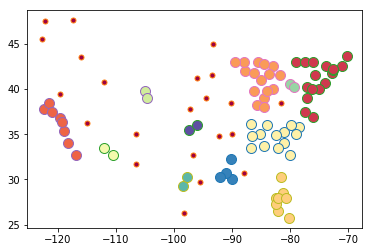

In [33]:
dbscanner(x, y, 2, 2)

In [34]:
dbscanner(x, y, 3, 2)

Silhouette Coefficient: 0.244
Estimated number of clusters: 8
Homogeneity: 0.291
Completeness: 0.781
V-measure: 0.424
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
